## 1. Importowanie danych

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

## 2. Analiza danych

In [3]:
X, y = mnist['data'], mnist['target']
print(X.shape) # 70000 obrazków o 784 cechach (28x28)
print(y.shape) # 70000 etykiet

(70000, 784)
(70000,)


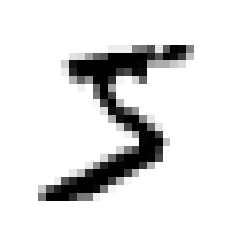

5


In [4]:
# wystiwtlenie przykladowego obrazka
import matplotlib as mpl 
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image  = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()
print(y[0])

In [5]:
# Przekonwertowanie etykiet na liczby
import numpy as np

print(type(y[0]))
y = y.astype(np.uint8)
print(type(y[0]))

<class 'str'>
<class 'numpy.uint8'>


## 3. Podział danych

In [6]:
# podzielenie danych - 60000 danyh treningowych, 10000 danych testowych
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

## 4. Kalsyfikacja wieloklasowa 

### Kalsyfikator maszyn wektorów nośnych

In [7]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train) 
svm_clf.predict([some_digit]) 
# wytrenowane jest 45 klasyfikatorów w strategi OvO (one vs one), co powoduje uzyskanie decyzji 

array([5], dtype=uint8)

In [8]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [9]:
np.argmax(some_digit_scores)

5

In [ ]:
cross_val_score(svm_clf, X_train, y_train, cv=3, scoring='accuracy')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled =scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(svm_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

### One vs Rest Classifier - Kalsyfikator maszyn wektorów nośnych

In [92]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
cross_val_score(ovr_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

### Klasyfikator Stochastycznego Spadku Gradientu

In [93]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42) 
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [94]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [96]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

## 5. Analiza błędów

### Macierz pomyłek 

In [97]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

### Graficzna reprezentacja macierzy pomyłek

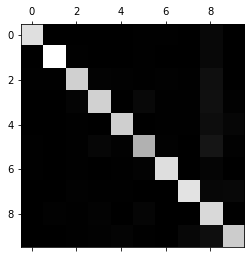

In [108]:
plt.figure(figsize=(10,10))
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

### Porównanie względnego błędu

In [1]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx/row_sums

NameError: name &#39;conf_mx&#39; is not defined

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.mathshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()